In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
filepath = os.path.join("logs", "manual_testing", "20_percent_infected")

collected_data = []

for folder in os.listdir(filepath):
    if os.path.isdir(os.path.join(filepath, folder)):
        for file in os.listdir(os.path.join(filepath, folder)):
            injured_bound, scram_bound = [int(x.split("b")[1]) for x in folder.split("_")]

            # parse results
            if file.startswith("results"):
                data = pd.read_csv(os.path.join(filepath, folder, file))
                collected_data.append({
                    'injured_bound': injured_bound,
                    'scram_bound': scram_bound,
                    'data':data.describe()
                })
            # read in actions
            elif file.startswith("actions"):
                pass
            # read config
            elif file.startswith("config"):
                pass

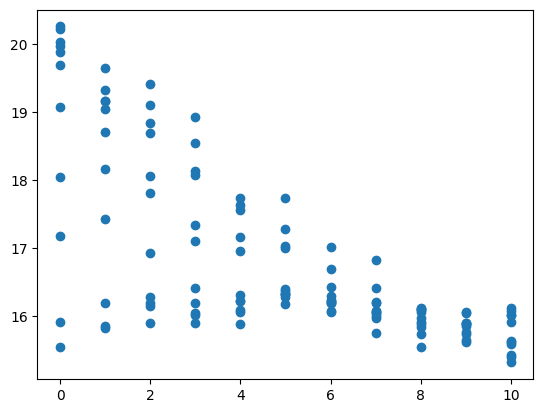

In [31]:
x = [x['injured_bound'] for x in collected_data]
y = [x['data'].mean()['saved_h'] for x in collected_data]

plt.plot(x, y, 'o')

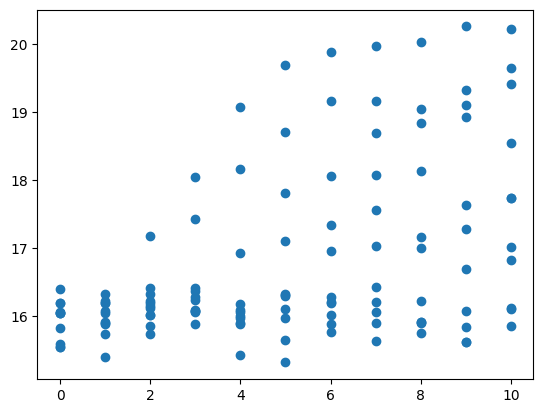

In [32]:
x = [x['scram_bound'] for x in collected_data]
y = [x['data'].mean()['saved_h'] for x in collected_data]

plt.plot(x, y, 'o')

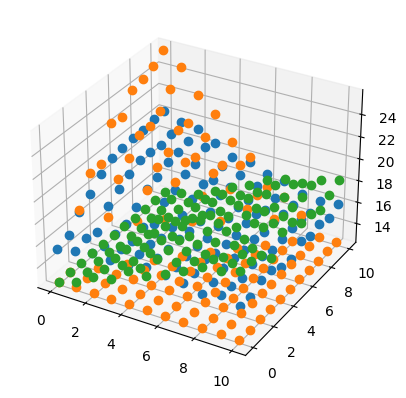

In [33]:
x = [x['injured_bound'] for x in collected_data]
y = [x['scram_bound'] for x in collected_data]
z_saved = [x['data'].mean()['saved_h'] for x in collected_data]
z_squish = [x['data'].mean()['killed_in_squish'] for x in collected_data]
z_zom = [x['data'].mean()['killed_zombie'] for x in collected_data]

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.plot3D(x, y, z_saved, 'o')
ax.plot3D(x, y, z_squish, 'o')
ax.plot3D(x, y, z_zom, 'o')


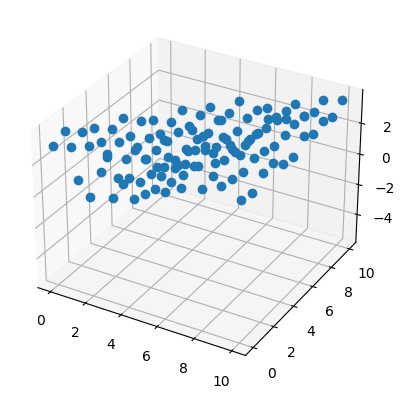

In [34]:
x = [x['injured_bound'] for x in collected_data]
y = [x['scram_bound'] for x in collected_data]
z_com = [x['data'].mean()['saved_h'] -x['data'].mean()['killed_in_squish'] for x in collected_data]

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.plot3D(x, y, z_com, 'o')


In [35]:
filepath = os.path.join("logs", "manual_testing", "ib5_sb10", "results.csv")
data = pd.read_csv(filepath)
data.describe().mean()

FileNotFoundError: [Errno 2] No such file or directory: 'logs/manual_testing/ib5_sb10/results.csv'